In [1]:
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
d_tr = pd.read_csv('/Users/antirrabia/Documents/01-GitHub/DataMining-_-/CSV/HousePrices/train.csv', index_col='Id')
d_te = pd.read_csv('/Users/antirrabia/Documents/01-GitHub/DataMining-_-/CSV/HousePrices/test.csv', index_col='Id')

### Identifying coumns names with nan

In [4]:
tr_col = d_tr.columns[ d_tr.isna().any() ].to_list() # any() goes on each columns to see if any column
te_col = d_te.columns[ d_te.isna().any() ].to_list() # has a True value witch means a nan is precented

# (list(set(tr_col).symmetric_difference(set(te_col)))) # columns with nan not comune in both DF (tr, te)
# list(set(tr_col).intersection(te_col)) # Common columns in both DataFrame with nan

In [53]:
d_te[te_col].isna().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [52]:
d_te[te_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1455 non-null   object 
 1   LotFrontage   1232 non-null   float64
 2   Alley         107 non-null    object 
 3   Utilities     1457 non-null   object 
 4   Exterior1st   1458 non-null   object 
 5   Exterior2nd   1458 non-null   object 
 6   MasVnrType    1443 non-null   object 
 7   MasVnrArea    1444 non-null   float64
 8   BsmtQual      1415 non-null   object 
 9   BsmtCond      1414 non-null   object 
 10  BsmtExposure  1415 non-null   object 
 11  BsmtFinType1  1417 non-null   object 
 12  BsmtFinSF1    1458 non-null   float64
 13  BsmtFinType2  1417 non-null   object 
 14  BsmtFinSF2    1458 non-null   float64
 15  BsmtUnfSF     1458 non-null   float64
 16  TotalBsmtSF   1458 non-null   float64
 17  BsmtFullBath  1457 non-null   float64
 18  BsmtHalfBath  1457 non-nu

array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>],
       [<AxesSubplot:title={'center':'GarageYrBlt'}>, <AxesSubplot:>]],
      dtype=object)

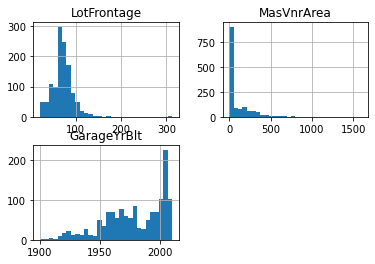

In [11]:
d_tr[tr_col].hist(bins=30)

In [13]:
null = d_te[d_te['MSZoning'].isnull()][["Neighborhood","MSZoning"]]
display(null)

,Neighborhood,MSZoning
Id,,
1916,IDOTRR,NaN
2217,IDOTRR,NaN
2251,IDOTRR,NaN
2905,Mitchel,NaN


In [14]:
null2 = d_te.loc[ d_te['MSZoning'].isna(), ["Neighborhood","MSZoning"] ]
display(null2)

,Neighborhood,MSZoning
Id,,
1916,IDOTRR,NaN
2217,IDOTRR,NaN
2251,IDOTRR,NaN
2905,Mitchel,NaN


In [15]:
d_te['MSZoning'].isna().sum()

4

In [16]:
X = d_tr.drop(columns='SalePrice').copy()
full = pd.concat([X,d_te],axis=0).reset_index(drop=True)


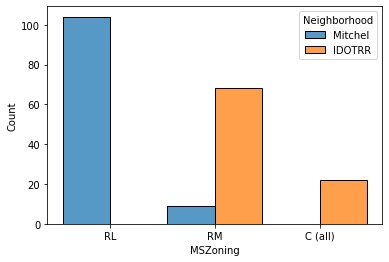

In [18]:
neighbor = ['IDOTRR', 'Mitchel']
plot_data = full[full['Neighborhood'].isin(neighbor)]

sns.histplot(data=plot_data, x='MSZoning', hue='Neighborhood', multiple='dodge', shrink=.9);

In [49]:
def mszoning(df):
    ''' recives a DF this imputation takes place on test data only'''
    
    df = df.copy()
    
    idotrr = ( (df['Neighborhood'] == 'IDOTRR') & (df['MSZoning'].isna()) )
    mitchel = ( (df['Neighborhood'] == 'Mitchel') & (df['MSZoning'].isna()) )
    
    df.loc[ idotrr , 'MSZoning'] = 'RM'
    df.loc[ mitchel, 'MSZoning'] = 'RL'
    
#     # to test this function out of here
#     temp = mszoning(d_te)
#     # lable index acces at [1916, 2217, 2251, 2905
#     temp.loc[[1916, 2217, 2251, 2905], 'MSZoning']
    
    return df

def lotFrontage(df):
    ''' recives a DF the imputation takes place on both 'tr', 'te' data'''
    df = df.copy()
    
    area_vs_frontage = LinearRegression()
    
    X = df['LotArea'].values#.reshape(-1,1)
    y = df['LotFrontage'].values
    
    area_vs_frontage.fit(X, y)
    
    
    

In [ ]:
area_vs_frontage = LinearRegression()
area_vs_frontage_X = data['LotArea'].values.reshape(-1, 1)
area_vs_frontage_y = data['LotFrontage'].values
area_vs_frontage.fit(area_vs_frontage_X,area_vs_frontage_y)
for table in [df,test]:
    table['LotFrontage'].fillna(area_vs_frontage.intercept_ + 
                                table['LotArea'] * area_vs_frontage.coef_[0] 
                                , inplace=True)

In [54]:
all_d = pd.concat([d_tr.copy(), d_te.copy()])

In [56]:
d_tr.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [57]:
d_te.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [63]:
all_d.iloc[[1459,1460,1461,1462]]#.index.to_list()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500.0
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN


In [3]:
d_te.index

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=1459)

In [4]:
d_te.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [5]:
d_te.loc[1463, 'MSZoning']

'RL'

In [8]:
d_te.index.get_loc(1463)

2

In [10]:
d_te.columns.get_loc('MSZoning')

1

In [3]:
d_te.index[7]

1468